<a href="https://colab.research.google.com/github/MahreenAthar/ObjectRecognition-Cifar10/blob/main/i191712_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
# from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

## Splitting data into train and test

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


## Performing Exploratory Data Analysis

### Checking shape of training and testing data

In [4]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Xy_test shape: ", y_test.shape)
# To check a sample image (from X_train) uncomment the line below
# X_train[0]
# To check a sample label (from y_train) uncomment the line below
# y_train[0]

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
Xy_test shape:  (10000, 1)


Checking values contained in the y_train. Here we see that y_train is actually a 2D array.

In [5]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

Now we don't want each y_train to be a 2D array, there's no need for this so we will reshape it and convert it into 1D array and also the y_test dataset.

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

The output (above) shows that y_train now is a 1D array that consists of numbers ranging from 0-9. There values represent the class label (classLabels list in below cell).

### Defining an image displaying function.
This function displays the image and it's label. By default a random value from 0-50,000 is being passed to the function (since there are 50,000 images in the training data) but any index can be manually passed to the function. 

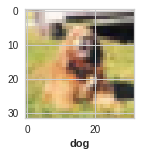

In [7]:
classLabels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# print(y_train[0], classLabels[y_train[0]])

def plotImageSample(X, y, index):
  plt.figure(figsize = (10, 2))
  plt.imshow(X[index])
  plt.xlabel(classLabels[y[index]], weight="bold")

randomImageNumber = np.random.randint(1, 50000)
plotImageSample(X_train, y_train, randomImageNumber)

### Normalizing RGB values
All RGB values range from 0-255, we wil be normalizing each pixel value by dividing it by 255 so all pixel values will range from 0-1.

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Convolutional Neural Network

In [ ]:
CNN = models.Sequential([
    # CNN layers => Convolution Layers + ReLU -> Pooling Layer -> COnv + ReLU -> Pooling 
    # Convolution layer for extracting the features
    # ReLU as the activation function
    # MaxPooling for dimension reduction and position-invarience feature detection
    layers.Conv2D(filters=27, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=57, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense neural network
    layers.Flatten(),
    layers.Dense(57, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Compiling, Fitting & Evaluating the CNN Model 

In [ ]:
CNN.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['Accuracy']
)

In [ ]:
CNN.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4932 - Accuracy: 0.4634
Epoch 2/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1100 - Accuracy: 0.6123
Epoch 3/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9798 - Accuracy: 0.6573
Epoch 4/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9036 - Accuracy: 0.6842
Epoch 5/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8445 - Accuracy: 0.7079
Epoch 6/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7983 - Accuracy: 0.7232
Epoch 7/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7558 - Accuracy: 0.7374
Epoch 8/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7189 - Accuracy: 0.7491
Epoch 9/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6843 - Accuracy: 0.7618
Epoch 10/15
1563/1563 [==============================] - 58s 37m

In [ ]:
CNN.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9832 - Accuracy: 0.6951


[0.9832061529159546, 0.6951000094413757]

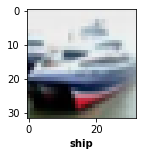

In [ ]:
plotImageSample(X_test, y_test, 1)

In [ ]:
y_pred = CNN.predict(X_test)
y_pred[:5]

array([[2.3817013e-03, 4.6199839e-05, 3.2500688e-03, 9.3451202e-01,
        6.5447148e-03, 5.1634241e-02, 1.4273748e-03, 1.3945982e-04,
        4.9324375e-05, 1.4960949e-05],
       [3.8926519e-04, 1.3179891e-03, 4.7140358e-07, 1.3528858e-09,
        3.9260464e-10, 3.6219054e-09, 4.3958497e-13, 1.0874150e-08,
        9.9828523e-01, 6.9770172e-06],
       [2.4874453e-02, 7.9538757e-01, 3.8644110e-04, 9.7413053e-04,
        3.1060821e-04, 2.6681417e-04, 4.8892423e-05, 1.2426893e-02,
        9.1006577e-02, 7.4317671e-02],
       [5.2800500e-01, 6.6993390e-03, 5.2085515e-02, 5.7864795e-04,
        1.5267527e-02, 6.9512353e-06, 3.0490610e-05, 2.6138837e-04,
        3.9682657e-01, 2.3849341e-04],
       [2.1622864e-06, 2.4111894e-05, 1.9070914e-02, 1.1196884e-01,
        4.5276427e-01, 1.8268952e-02, 3.9788729e-01, 4.3371761e-06,
        6.8534323e-06, 2.2038153e-06]], dtype=float32)

Now we will be storing all the class labels each y_pred

In [ ]:
y_classes = [np.argmax(i) for i in y_pred]

In [ ]:
y_classes[:5]

[3, 8, 1, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

### Classification report for CNN

In [ ]:
print("Classification Report: \n-------------------------------------------------\n", classification_report(y_test, y_classes))

Classification Report: 
-------------------------------------------------
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      1000
           1       0.80      0.84      0.82      1000
           2       0.61      0.57      0.59      1000
           3       0.52      0.47      0.49      1000
           4       0.70      0.57      0.63      1000
           5       0.56      0.62      0.59      1000
           6       0.78      0.79      0.78      1000
           7       0.71      0.77      0.73      1000
           8       0.77      0.83      0.80      1000
           9       0.77      0.78      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.69      0.70      0.69     10000



## Linear Regression

In [10]:
X = X_train.reshape(50000, 3*32*32)
Xt = X_test.reshape(10000, 3*32*32)
y = y_train.flatten()
yt = y_test.flatten()

In [11]:
linreg = LogisticRegression(verbose=True)
linreg.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


LogisticRegression(verbose=True)

In [12]:
predicted = linreg.predict(X)

In [13]:
np.unique((y==0).astype(np.int8))

array([0, 1], dtype=int8)

In [14]:
predicted_r = np.round(predicted)

In [15]:
metrics.accuracy_score(y, predicted)

0.42922

In [16]:
test_predicted = linreg.predict(Xt)

In [17]:
metrics.accuracy_score(yt, test_predicted)

0.4063